# Instrumental Variables Monte Carlo Simulation

This exercise will have you will run a Monte Carlo experiment to demonstrate the bias from an endogenous regressor and how the instrumental variable procedure can remedy the situation.

**4 points each**


#### Q1. Write a function that generates data from the following data generating process.

Generate data from the following data generating process. Let
\begin{gather}
x_1 = \gamma_0 + \gamma_1 z_1 + u \\
y = \beta_0 + \beta_1 x_1 + \epsilon,
\end{gather}
where 
 - the covariance between $\epsilon$ and $u$ is 1/2,
 - the covariance between $z_1$ and $\epsilon$ is 0,
 - and let $u$, $z_1$, and $\epsilon$ be Normally distributed (jointly, let them be a multivariate Normal). Let them be mean zero with covariance between pairs to be 0, unless otherwise stated above. Let the variance of each be 1.
 
Let $\beta_0 = \beta_1 = \gamma_0 = \gamma_1 =1$.

The function should take in `N`, the size of the resulting sample. It should return a pandas DataFrame.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import pandas as pd

def generate_data(N=50):
    mean = np.array([0,0,0])
    cov = np.array([[1, 0, .5],
                    [0, 1, 0],
                    [.5, 0, 1]])
    vec = np.random.multivariate_normal(mean, cov, N)
    df = pd.DataFrame(vec, columns=['u', 'z1', 'epsilon'])
    beta0 = beta1 = gamma0 = gamma1 = 1
    beta2 = 2
    df['x1'] = gamma0 + gamma1 * df.z1 + df.u
    df['y'] = beta0 + beta1 * df.x1 + df.epsilon
    return df

In [2]:
df = generate_data(N=50)
df.head()

,u,z1,epsilon,x1,y
0,-0.254626,0.368862,-0.451050,1.114236,1.663185
1,-2.213827,-0.029624,-1.025808,-1.243450,-1.269258
2,-1.014797,-0.424108,-0.214698,-0.438905,0.346397
3,0.040090,0.973366,0.540609,2.013456,3.554065
4,0.738014,-0.074320,1.050628,1.663694,3.714322


#### Q2. Generate a single dataset and demonstrate OLS

Set the seed to `100` by running `np.random.seed(100)`. Then generate a single dataset with `N=100`. Use OLS to regress `y` on `x1` (including a constant). Do this using `statsmodels`. Do this once using the normal api and once using the formula api. Are our estimates biased?

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
np.random.seed(100)
df = generate_data(N=100)

In [5]:
endog = df.y
exog = sm.add_constant(df.x1)
reg = sm.OLS(endog=endog, exog=exog).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     277.0
Date:                Fri, 18 May 2018   Prob (F-statistic):           2.59e-30
Time:                        01:46:57   Log-Likelihood:                -144.27
No. Observations:                 100   AIC:                             292.5
Df Residuals:                      98   BIC:                             297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8040      0.134      5.987      0.000       0.538       1.071
x1             1.2215      0.073     16.643      0.000       1.076       1.367
==============================================================================
Omnibus:                        1.625   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.074
Skew:                          -0.151   Prob(JB):                        0.585
Kurtosis:                       3.408   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     277.0
Date:                Fri, 18 May 2018   Prob (F-statistic):           2.59e-30
Time:                        01:46:57   Log-Likelihood:                -144.27
No. Observations:                 100   AIC:                             292.5
Df Residuals:                      98   BIC:                             297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8040      0.134      5.987      0.000       0.538       1.071
x1             1.2215      0.073     16.643      0.000       1.076       1.367
==============================================================================
Omnibus:                        1.625   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.074
Skew:                          -0.151   Prob(JB):                        0.585
Kurtosis:                       3.408   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q3. For the regression above, derive the expression for the bias of the estimate of $\beta_1$ (in the probability limit).

Write the derivation of the expression in a markdown cell below. Use LaTeX math to write out the expression. Use the numbers we gave above to calculate the bias.

SOLUTION:

$$
\tilde \beta_1 \overset{p}{\rightarrow} \beta_1 + \frac{Cov(\epsilon, x_1)}{Var(x_1)} 
= \beta_1 + \frac{Cov(\epsilon, u)}{Var(x_1)} = \beta_1 + 1/2
$$

The bias in the limit is 1/2.

#### Q4. Estimate the model using `z1` as an instrument.

Use the `linearmodels` package to estimate the same model, but using `z1` as an instrument. Use the formula api and use 2 stage least squares. (Note: Don't forget to include the intercept.)

In [7]:
import linearmodels

In [8]:
df.head()

,u,z1,epsilon,x1,y
0,2.091859,-0.342680,0.938823,2.749179,4.688002
1,0.475725,-0.981321,-0.038493,0.494405,1.455911
2,-0.286295,1.070043,-0.096799,1.783748,2.686949
3,-0.003256,0.458027,-0.438419,1.454771,2.016352
4,0.841769,-0.816847,0.169048,1.024921,2.193969


In [9]:
reg = linearmodels.IV2SLS.from_formula('y ~ 1+ [x1 ~ z1]', data=df).fit()
reg

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      y   R-squared:                      0.6760
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6727
No. Observations:                 100   F-statistic:                    64.214
Date:                Fri, May 18 2018   P-value (F-stat)                0.0000
Time:                        01:46:57   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      1.2191     0.1668     7.3070     0.0000      0.8921      1.5461
x1             0.8657     0.1080     8.0133     0.0000      0.6540      1.0775
==============================================================================

Endogenous: x1
Instruments: z1
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x28b457c3630

In [10]:
df.head()

,u,z1,epsilon,x1,y
0,2.091859,-0.342680,0.938823,2.749179,4.688002
1,0.475725,-0.981321,-0.038493,0.494405,1.455911
2,-0.286295,1.070043,-0.096799,1.783748,2.686949
3,-0.003256,0.458027,-0.438419,1.454771,2.016352
4,0.841769,-0.816847,0.169048,1.024921,2.193969


#### Q5. When is IV consistent?

What assumptions are needed for IV to give consistent estimates? Explain whether or not those assumptions hold in the model that we created above.

SOLUTION:

We need instrument exogeneity and instrument relevance. They both hold according to our model set up above. The instrument $z_1$ is independent of $\epsilon$ and $z_1$ is correlated with $x_1$.

#### Q6. Design and implement a Monte Carlo experiment... part 1

Design and implement a Monte Carlo experiment to show that the OLS regression that we ran above is biased and *not consistent*. That is, that the bias doesn't go away with higher sample sizes. You have some flexibility in the way you choose to implement this experiment. This doesn't have to be very elaborate---it should just be enough to convince you of this fact. Follow the example from class and use pictures (and a table if you like).

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [12]:
def run_mc(estimation_procedure, DGP, M=1000, seed=100):
    np.random.seed(seed)
    df = DGP()
    fitted_params = estimation_procedure(df)
    results = pd.DataFrame(index=range(M), columns=fitted_params.index, dtype=np.float)
    for m in range(M):
        df = DGP()
        fitted_params = estimation_procedure(df)
        results.loc[m, :] = fitted_params
    return results

In [13]:
DGP = lambda : generate_data(N=50)
estimation_procedure = lambda df: smf.ols('y ~ x1', df).fit().params
results_N50 = run_mc(estimation_procedure, DGP)

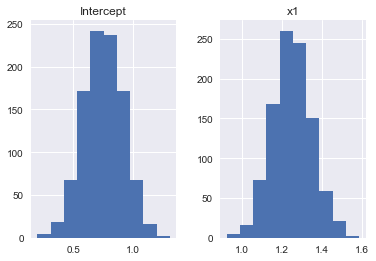

In [14]:
results_N50.hist();

In [15]:
DGP = lambda : generate_data(N=200)
results_N200 = run_mc(estimation_procedure, DGP)
DGP = lambda : generate_data(N=1000)
results_N1000 = run_mc(estimation_procedure, DGP)

C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


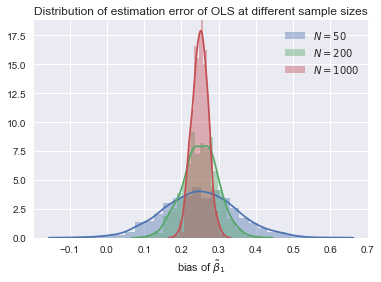

In [16]:
sns.distplot(results_N50.x1 - 1, label='$N=50$')
sns.distplot(results_N200.x1 - 1, label='$N=200$')
sns.distplot(results_N1000.x1 - 1, label='$N=1000$')
plt.title('Distribution of estimation error of OLS at different sample sizes')
plt.xlabel(r'bias of $\tilde \beta_1$')
plt.legend();

As we see above, OLS is biased inconsistent when regressor is endogenous.

#### Q7. Design and implement a Monte Carlo experiment... part 2

Design and implement a Monte Carlo experiment to show that the IV regression that we ran above is biased but is *consistent*. That is, that the bias goes away with higher sample sizes. You have some flexibility in the way you choose to implement this experiment. This doesn't have to be very elaborate---it should just be enough to convince you of this fact. Follow the example from class and use pictures (and a table if you like).

Note: For this exercise, don't worry about showing that IV is biased. Just show that it's consistent.

In [17]:
estimation_procedure = lambda df: linearmodels.IV2SLS.from_formula('y ~ 1+ [x1 ~ z1]', data=df).fit().params

DGP = lambda : generate_data(N=50)
iv_results_N50 = run_mc(estimation_procedure, DGP)
DGP = lambda : generate_data(N=200)
iv_results_N200 = run_mc(estimation_procedure, DGP)
DGP = lambda : generate_data(N=1000)
iv_results_N1000 = run_mc(estimation_procedure, DGP)

C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


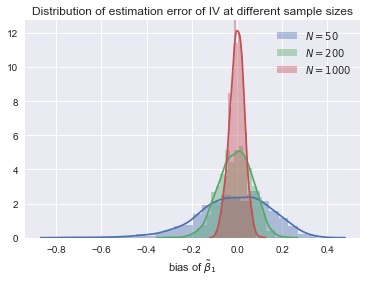

In [18]:
sns.distplot(iv_results_N50.x1 - 1, label='$N=50$')
sns.distplot(iv_results_N200.x1 - 1, label='$N=200$')
sns.distplot(iv_results_N1000.x1 - 1, label='$N=1000$')
plt.title('Distribution of estimation error of IV at different sample sizes')
plt.xlabel(r'bias of $\tilde \beta_1$')
plt.legend();